In [18]:
!pip install pyreadr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import pyreadr

result = pyreadr.read_r('/content/sample_data/ticks_training_set.rds')

In [20]:
df = result[None]
df

,Time_step,Ticks,Total,Density,Grid_ID,X,Y,Date,row.id,bioclim1_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207,...,monthly.tmax_terraclimate_m,monthly.tmin_terraclimate_m,tropospheric.n02_sentinel5p_p0.1,tropospheric.n02_sentinel5p_p0.5,tropospheric.n02_sentinel5p_p0.9,vis.nightlight_vcmslcfg.npp.avg_m,vis.nightlight_vcmslcfg.npp.max_m,vis.nightlight_vcmslcfg.npp.min_m,cosmonth,tick_f
0,05/2018,1,8,0.125000,54357,456500.0,77500.0,2018-05-15,571683,2846.0,...,776.0,672.0,36.0,57.0,79.0,3.283688,4.580301,2.102548,-8.660254e-01,2.602690
1,09/2016,1,11,0.090909,381937,436500.0,545500.0,2016-09-15,263929,2824.0,...,779.0,706.0,25.0,41.0,82.0,11.429529,22.503174,6.653575,-1.836970e-16,2.311635
2,08/2014,1,22,0.045455,115331,530500.0,164500.0,2014-08-15,128875,2836.0,...,811.0,715.0,82.0,133.0,158.0,35.152241,44.384518,20.824520,-5.000000e-01,1.712979
3,06/2021,1,2,0.500000,262225,424500.0,374500.0,2021-06-15,1223163,2823.0,...,775.0,688.0,24.0,44.0,81.0,1.857337,3.596680,0.948845,-1.000000e+00,3.931826
4,09/2016,1,64,0.015625,269933,432500.0,385500.0,2016-09-15,260432,2822.0,...,783.0,708.0,45.0,92.0,119.0,13.085036,17.122564,10.844384,-1.836970e-16,0.940983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,12/2016,0,2,0.000000,164739,238500.0,235500.0,2016-12-15,370828,2825.0,...,688.0,643.0,10.0,24.0,52.0,0.000133,0.673705,0.108800,1.000000e+00,0.000000
14796,06/2021,0,14,0.000000,234950,449500.0,335500.0,2021-06-15,1222155,2831.0,...,787.0,698.0,50.0,69.0,99.0,10.858850,14.043921,7.124894,-1.000000e+00,0.000000
14797,12/2018,0,6,0.000000,241888,387500.0,345500.0,2018-12-15,714503,2826.0,...,687.0,643.0,53.0,80.0,106.0,45.707924,59.500580,27.877371,1.000000e+00,0.000000
14798,03/2021,0,1,0.000000,155945,544500.0,222500.0,2021-03-15,1172904,2832.0,...,720.0,648.0,31.0,53.0,79.0,1.628771,2.432874,1.190656,6.123234e-17,0.000000


In [21]:
for col in df.columns:
    print(col)

Time_step
Ticks
Total
Density
Grid_ID
X
Y
Date
row.id
bioclim1_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim10_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim11_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim12_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim2_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim3_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim4_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim5_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim6_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim7_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim8_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
bioclim9_chelsa.v2.1_s_19820101_20101231_gb_epsg.27700_v20230207
cats.density_aegerter.2017_m_1km_s_20160101_20181231_gb_epsg.27700_v20221201
deer.prob_osgbirall3_p_1km_s_20180101_20201231_gb_epsg.27700_v20230207
dogs.density_ae

In [22]:

#validation_grids = pyreadr.read_r('/content/sample_data/data_1km_static.rds')
#df_validation = validation_grids[None]
#df_validation

In [23]:
df['Ticks']

0        1
1        1
2        1
3        1
4        1
        ..
14795    0
14796    0
14797    0
14798    0
14799    0
Name: Ticks, Length: 14800, dtype: int32

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [25]:
non_numerical_cols = df.select_dtypes(exclude=['number']).columns
non_numerical_df = df[non_numerical_cols]


In [26]:
# Separate the target variable if needed
target = df['Ticks']
df = df.drop('Ticks', axis=1)

numerical_cols = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_cols]

numerical_df = numerical_df.fillna(0)

gis_df = df[['Grid_ID', 'X', 'Y']]
df = df.drop(['Grid_ID', 'X', 'Y'], axis=1)

# Scaling and normalization using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)  # Scale the numerical columns

# Create a new DataFrame with the scaled and normalized data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)

# Concatenate the target variable if separated earlier
if 'Ticks' in df.columns:
    scaled_df['Ticks'] = target



# Number of Features to be selected for Prediction using Scree Plot


A scree plot shows the eigenvalues on the y-axis and the number of factors on the x-axis. It always displays a downward curve. The point where the slope of the curve is clearly leveling off (the “elbow) indicates the number of factors that should be generated by the analysis.

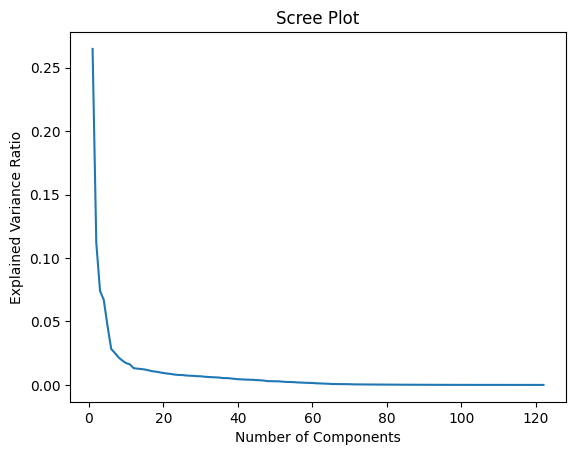

In [27]:
from sklearn.decomposition import PCA

# Perform PCA for feature reduction
#pca = PCA(n_components=2)  # Specify the number of components to keep
#reduced_features = pca.fit_transform(scaled_df)

#reduced_df = pd.DataFrame(data=reduced_features, columns=['PC1', 'PC2'])


#educed_df['Ticks'] = target

#final_scaled_df = pd.concat([non_numerical_df, gis_df, reduced_df], axis=1)
#final_scaled_df


import matplotlib.pyplot as plt

# Fit PCA on your data
pca = PCA()
pca.fit(scaled_df)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()





# Cumulative Explained Variance 

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

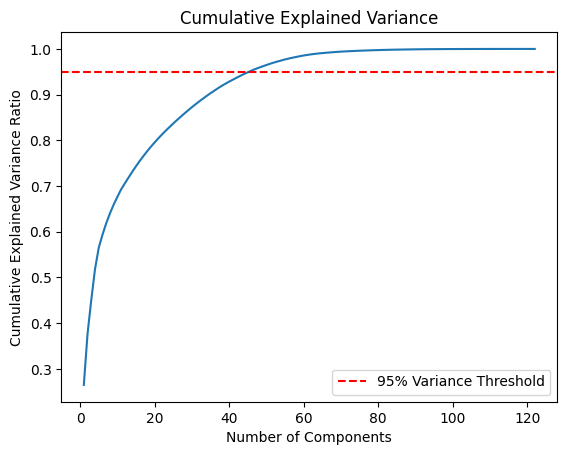

In [28]:
import numpy as np
pca = PCA()
pca.fit(scaled_df)

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.show()

# Cross Validation Approach

Cross-Validation: Another approach is to use cross-validation techniques, such as k-fold cross-validation, to evaluate the performance of the model with different numbers of components. You can compare the model's performance metrics (e.g., accuracy, RMSE) for different numbers of components and choose the number that provides the best trade-off between model performance and complexity.

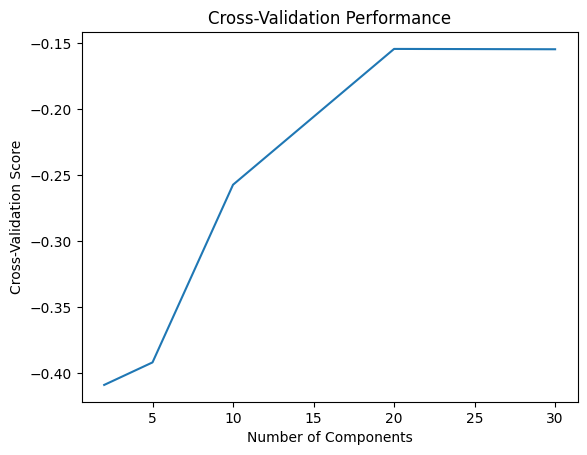

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error


# Define your model
model = LinearRegression()

# Perform k-fold cross-validation for different numbers of components
num_components = [2, 5, 10, 20, 30]
scores = []
for n in num_components:
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(scaled_df)
    score = cross_val_score(model, X_transformed, target, cv=5, scoring='neg_mean_squared_error')
    scores.append(score.mean())

# Plot the cross-validation scores
plt.plot(num_components, scores)
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Performance')
plt.show()


# Optimal number of components 

I am happy that I found optimal number of components using **cross validation**, **screen plot** and **Cumulative Explained Variance**

![Happy...](https://media3.giphy.com/media/5GoVLqeAOo6PK/giphy.gif?cid=ecf05e47m86z75yts7tobebhw8x2ckx9hz7qpwj0sqwf6ui5&ep=v1_gifs_search&rid=giphy.gif&ct=g)


# Applying PCA on scaled dataframe



In [30]:
from sklearn.preprocessing import MinMaxScaler


pca = PCA(n_components=15)  # Specify the number of components to keep
reduced_features = pca.fit_transform(scaled_df)


scaler = MinMaxScaler()
scaled_pca_components = scaler.fit_transform(reduced_features)


labels = ['PC1','PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']
reduced_df = pd.DataFrame(data=scaled_pca_components, columns=labels)


reduced_df['Ticks'] = target

final_scaled_df = pd.concat([non_numerical_df, gis_df, reduced_df], axis=1)
final_scaled_df

,Time_step,Date,Grid_ID,X,Y,PC1,PC2,PC3,PC4,PC5,...,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Ticks
0,05/2018,2018-05-15,54357,456500.0,77500.0,0.178522,0.226282,0.948753,0.857759,0.772039,...,0.191065,0.322205,0.302467,0.502369,0.367281,0.244825,0.268127,0.479011,0.286982,1
1,09/2016,2016-09-15,381937,436500.0,545500.0,0.241500,0.505479,0.332641,0.332734,0.377504,...,0.358387,0.261687,0.340357,0.607311,0.439762,0.327530,0.311841,0.337801,0.164787,1
2,08/2014,2014-08-15,115331,530500.0,164500.0,0.518083,0.295697,0.358581,0.275593,0.369846,...,0.386429,0.350438,0.345728,0.523295,0.463265,0.246747,0.239372,0.402261,0.186470,1
3,06/2021,2021-06-15,262225,424500.0,374500.0,0.180672,0.452610,0.441912,0.189801,0.326147,...,0.246963,0.281504,0.248551,0.499924,0.500707,0.436657,0.247004,0.317012,0.272602,1
4,09/2016,2016-09-15,269933,432500.0,385500.0,0.446969,0.500423,0.417356,0.231316,0.368935,...,0.278152,0.265533,0.450226,0.550513,0.414554,0.308015,0.267181,0.483248,0.176280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,12/2016,2016-12-15,164739,238500.0,235500.0,0.119786,0.533914,0.452407,0.267558,0.302258,...,0.455739,0.222108,0.292514,0.452071,0.580082,0.388290,0.258419,0.376263,0.180561,0
14796,06/2021,2021-06-15,234950,449500.0,335500.0,0.314520,0.335868,0.303262,0.301268,0.358064,...,0.339887,0.244913,0.307738,0.488406,0.501479,0.295944,0.311025,0.422159,0.104716,0
14797,12/2018,2018-12-15,241888,387500.0,345500.0,0.588655,0.515036,0.384058,0.246279,0.376920,...,0.532628,0.370358,0.423698,0.421705,0.547783,0.415562,0.241605,0.367846,0.117438,0
14798,03/2021,2021-03-15,155945,544500.0,222500.0,0.252562,0.254036,0.204441,0.363139,0.346031,...,0.416379,0.295871,0.326751,0.485998,0.424544,0.473295,0.244876,0.513909,0.187769,0


In [31]:
reduced_df.loc[:, reduced_df.columns!='Ticks']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.178522,0.226282,0.948753,0.857759,0.772039,0.318758,0.191065,0.322205,0.302467,0.502369,0.367281,0.244825,0.268127,0.479011,0.286982
1,0.241500,0.505479,0.332641,0.332734,0.377504,0.520515,0.358387,0.261687,0.340357,0.607311,0.439762,0.327530,0.311841,0.337801,0.164787
2,0.518083,0.295697,0.358581,0.275593,0.369846,0.472103,0.386429,0.350438,0.345728,0.523295,0.463265,0.246747,0.239372,0.402261,0.186470
3,0.180672,0.452610,0.441912,0.189801,0.326147,0.421974,0.246963,0.281504,0.248551,0.499924,0.500707,0.436657,0.247004,0.317012,0.272602
4,0.446969,0.500423,0.417356,0.231316,0.368935,0.385461,0.278152,0.265533,0.450226,0.550513,0.414554,0.308015,0.267181,0.483248,0.176280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,0.119786,0.533914,0.452407,0.267558,0.302258,0.349522,0.455739,0.222108,0.292514,0.452071,0.580082,0.388290,0.258419,0.376263,0.180561
14796,0.314520,0.335868,0.303262,0.301268,0.358064,0.456792,0.339887,0.244913,0.307738,0.488406,0.501479,0.295944,0.311025,0.422159,0.104716
14797,0.588655,0.515036,0.384058,0.246279,0.376920,0.328437,0.532628,0.370358,0.423698,0.421705,0.547783,0.415562,0.241605,0.367846,0.117438
14798,0.252562,0.254036,0.204441,0.363139,0.346031,0.316684,0.416379,0.295871,0.326751,0.485998,0.424544,0.473295,0.244876,0.513909,0.187769


# Applying GMM Model

GMM is a probabilistic model that assumes data points are generated from a mixture of Gaussian distributions. This flexibility allows GMM to capture complex patterns and variations in the data, making it suitable for modeling a wide range of numerical variables.

In [33]:
data_df = pd.concat([non_numerical_df,gis_df, reduced_df], axis=1)
#data_df = data_df.drop(['Date'], axis=1)
data_df['date'] = pd.to_datetime(data_df['Time_step'], format="%m/%Y")
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month
data_df.drop('date', axis=1, inplace=True)
data_df.drop('Date', axis=1, inplace=True)
#data_df.drop('Time_step', axis=1, inplace=True)

data_df

,Time_step,Grid_ID,X,Y,PC1,PC2,PC3,PC4,PC5,PC6,...,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Ticks,year,month
0,05/2018,54357,456500.0,77500.0,0.178522,0.226282,0.948753,0.857759,0.772039,0.318758,...,0.302467,0.502369,0.367281,0.244825,0.268127,0.479011,0.286982,1,2018,5
1,09/2016,381937,436500.0,545500.0,0.241500,0.505479,0.332641,0.332734,0.377504,0.520515,...,0.340357,0.607311,0.439762,0.327530,0.311841,0.337801,0.164787,1,2016,9
2,08/2014,115331,530500.0,164500.0,0.518083,0.295697,0.358581,0.275593,0.369846,0.472103,...,0.345728,0.523295,0.463265,0.246747,0.239372,0.402261,0.186470,1,2014,8
3,06/2021,262225,424500.0,374500.0,0.180672,0.452610,0.441912,0.189801,0.326147,0.421974,...,0.248551,0.499924,0.500707,0.436657,0.247004,0.317012,0.272602,1,2021,6
4,09/2016,269933,432500.0,385500.0,0.446969,0.500423,0.417356,0.231316,0.368935,0.385461,...,0.450226,0.550513,0.414554,0.308015,0.267181,0.483248,0.176280,1,2016,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,12/2016,164739,238500.0,235500.0,0.119786,0.533914,0.452407,0.267558,0.302258,0.349522,...,0.292514,0.452071,0.580082,0.388290,0.258419,0.376263,0.180561,0,2016,12
14796,06/2021,234950,449500.0,335500.0,0.314520,0.335868,0.303262,0.301268,0.358064,0.456792,...,0.307738,0.488406,0.501479,0.295944,0.311025,0.422159,0.104716,0,2021,6
14797,12/2018,241888,387500.0,345500.0,0.588655,0.515036,0.384058,0.246279,0.376920,0.328437,...,0.423698,0.421705,0.547783,0.415562,0.241605,0.367846,0.117438,0,2018,12
14798,03/2021,155945,544500.0,222500.0,0.252562,0.254036,0.204441,0.363139,0.346031,0.316684,...,0.326751,0.485998,0.424544,0.473295,0.244876,0.513909,0.187769,0,2021,3


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#data_df.drop('Time_step', axis=1, inplace=True)


X = data_df.loc[:, data_df.columns!='Ticks']
y = data_df.Ticks

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

#cv_scores = cross_val_score(model, X, y, cv=5)


# Print the cross-validation scores
#print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
#mean_accuracy = cv_scores.mean()
#print("Mean Accuracy:", mean_accuracy)

#model.fit(X, y)

#

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2):", r2)


y_test

Mean Squared Error (MSE): 0.0916458108108108
Mean Absolute Error (MAE): 0.180722972972973
Root Mean Squared Error: 0.3027305911380791
R-squared (R2): 0.6892303069404608


10712    0
1034     1
8727     0
14651    0
6504     1
        ..
12073    0
1288     1
11924    0
2400     1
6725     1
Name: Ticks, Length: 2960, dtype: int32

In [ ]:
import pandas as pd
validation_df = pd.read_csv('/content/sample_data/MOOD_Summer_School_2023 - Validation_set.csv')
validation_df['date'] = pd.to_datetime(validation_df['Time_step'], format="%m/%Y")
validation_df['year'] = validation_df['date'].dt.year
validation_df['month'] = validation_df['date'].dt.month
validation_df.drop('date', axis=1, inplace=True)
validation_df.drop('Ticks', axis=1, inplace=True)
validation_df['Time_step'].unique()
#validation_df


In [ ]:
merged_df = pd.merge(validation_df, validation_df, on=['Time_step','Grid_ID', 'X', 'Y'], how='left')
merged_df.dropna(axis=1)
merged_df

In [ ]:
#y_test_pred = model.predict(X_test)

X_VAL = merged_df.loc[:, merged_df.columns!='Ticks']
X_VAL = X_VAL.loc[:, X_VAL.columns!='Time_step']
X_VAL

